<a href="https://colab.research.google.com/github/irving91/bike-share-sim-nugget/blob/master/London_Bike_Share_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import random

from scipy.stats import poisson 
from sklearn.preprocessing import StandardScaler

In [ ]:
stations = pd.read_csv('stations.csv')
journeys = pd.read_csv('journeys.csv')

In [ ]:
stations.head()

,Station ID,Capacity,Latitude,Longitude,Station Name
0,1,19,51.529163,-0.109970,"River Street , Clerkenwell"
1,2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"
2,3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street"
3,4,23,51.530059,-0.120973,"St. Chad's Street, King's Cross"
4,5,27,51.493130,-0.156876,"Sedding Street, Sloane Square"


In [ ]:
journeys.head()

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36


In [ ]:
# Preprocessing Tasks
# 1) Merge datasets 
df = pd.merge(journeys, stations, left_on = 'Start Station ID', right_on = 'Station ID', how = 'left')

In [ ]:
# 2) Get minute and hour into a single column
df['Start Datetime'] = df['Start Hour'] + df['Start Minute']/60
df['End Datetime'] = df['End Hour'] + df['End Minute']/60

In [ ]:
# 3) Zoom out to a timeframe that makes sense
df['Start Datetime Rounded'] = np.round(df['Start Datetime'])
df['Start Datetime Rounded'] = df['Start Datetime Rounded'].apply(lambda x: 0 if x==24 else x)

In [ ]:
df['End Datetime Rounded'] = np.round(df['End Datetime'])
df['End Datetime Rounded'] = df['End Datetime Rounded'].apply(lambda x: 0 if x==24 else x)
df[['End Datetime','End Datetime Rounded']].head()

,End Datetime,End Datetime Rounded
0,18.000000,18.0
1,15.350000,15.0
2,17.016667,17.0
3,12.266667,12.0
4,19.550000,20.0


In [ ]:
# 4) Get dates into single column.

In [ ]:
df['Start DMY'] = pd.to_datetime(df['Start Date'].map(str) + '-' + 
                                 df['Start Month'].map(str) + '-' + 
                                 df['Start Year'].map(str))
df['End DMY'] = pd.to_datetime(df['End Date'].map(str) + '-' + 
                               df['End Month'].map(str) + '-' + 
                               df['End Year'].map(str))
df.head()


,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID,Station ID,Capacity,Latitude,Longitude,Station Name,Start Datetime,End Datetime,Start Datetime Rounded,End Datetime Rounded,Start DMY,End DMY
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251,251.0,34.0,51.518908,-0.079249,"Brushfield Street, Liverpool Street",17.433333,18.000000,17.0,18.0,2017-09-19,2017-09-19
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550,550.0,23.0,51.521564,-0.039264,"Harford Street, Mile End",14.850000,15.350000,15.0,15.0,2017-09-19,2017-09-19
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212,212.0,17.0,51.506584,-0.199004,"Campden Hill Road, Notting Hill",16.700000,17.016667,17.0,17.0,2017-09-15,2017-09-15
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163,163.0,27.0,51.493184,-0.167894,"Sloane Avenue, Knightsbridge",12.150000,12.266667,12.0,12.0,2017-09-14,2017-09-14
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36,36.0,28.0,51.501737,-0.184980,"De Vere Gardens, Kensington",19.216667,19.550000,19.0,20.0,2017-09-13,2017-09-13


In [ ]:
# Use groupby() to get mean average arrivals and departures per time period
arrival_df = df.groupby(['End Station ID', 
                         'End Datetime Rounded', 
                         'End DMY'], as_index=False)['Journey ID'].count()
arrival_df = arrival_df.groupby(['End Station ID', 
                                 'End Datetime Rounded'])['Journey ID'].mean().round(2).unstack(level=0).fillna(0)
arrival_df

End Station ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,42,...,781,782,783,784,785,786,787,788,789,790,792,793,794,795,796,797,798,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,826
End Datetime Rounded,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1.31,1.00,1.29,1.57,2.47,1.50,1.93,1.00,1.91,1.50,1.33,1.70,1.12,2.20,1.46,1.94,1.74,1.17,1.12,1.00,1.73,1.50,1.00,1.47,1.35,1.33,1.22,2.16,1.56,1.61,1.41,1.90,2.28,1.36,1.64,1.94,1.43,2.70,1.92,1.52,...,2.00,1.73,1.61,2.09,3.69,1.36,3.79,2.14,2.57,1.62,2.10,1.90,2.00,1.43,1.43,1.64,1.36,1.47,1.50,1.71,1.43,2.00,1.17,1.62,1.70,1.53,0.00,1.56,1.50,1.62,1.83,2.20,2.04,0.00,2.38,3.06,2.28,2.05,1.43,2.45
1.0,1.00,1.00,1.67,1.67,1.18,0.00,1.44,2.00,1.85,1.50,1.22,1.56,1.00,2.12,2.00,1.00,1.57,2.09,1.25,1.75,1.58,1.36,2.00,1.67,1.17,1.50,1.00,1.33,1.60,1.18,1.67,1.91,2.00,1.57,1.44,1.75,1.20,2.69,1.44,1.77,...,1.00,1.73,1.56,2.59,4.33,1.80,2.00,1.67,2.55,2.20,2.20,1.53,1.00,1.60,1.75,1.67,1.33,1.69,1.25,1.29,1.50,1.89,1.17,1.50,1.53,1.50,1.00,1.67,1.25,2.25,1.67,1.30,2.00,2.50,1.82,2.54,2.92,1.50,1.00,1.25
2.0,2.00,1.00,1.00,1.33,1.33,1.00,1.44,1.00,3.00,2.25,1.12,1.44,1.00,2.07,1.00,2.20,1.11,1.00,0.00,1.00,1.33,1.00,1.50,2.09,1.86,1.47,1.00,1.89,1.22,1.29,1.67,1.00,1.93,1.20,1.00,2.29,1.43,2.56,1.50,1.14,...,2.00,1.30,1.62,1.78,3.11,9.00,1.44,1.00,1.33,2.00,1.67,1.18,1.00,3.00,1.56,2.00,1.77,1.44,1.00,1.46,1.50,1.57,1.60,1.60,1.40,1.33,1.33,2.00,1.25,2.00,1.14,1.90,1.92,0.00,1.38,3.18,2.69,2.00,1.60,2.00
3.0,0.00,0.00,1.50,1.00,1.00,1.00,1.25,1.00,2.00,2.00,0.00,1.67,1.50,1.92,1.20,1.83,1.67,1.50,1.00,2.33,1.33,1.17,2.00,2.27,1.40,1.25,1.33,1.20,1.00,1.00,1.50,1.60,1.60,2.33,1.00,1.33,1.17,1.55,2.33,1.00,...,1.67,1.43,1.17,1.00,2.40,0.00,1.75,0.00,1.00,1.40,1.50,1.20,1.00,2.00,1.83,1.17,2.10,1.57,0.00,1.27,1.00,0.00,1.50,2.00,1.60,1.00,1.00,1.20,1.50,1.33,1.71,1.82,2.25,0.00,1.14,2.82,1.75,1.33,1.00,1.00
4.0,1.60,0.00,0.00,1.75,1.00,1.00,2.00,1.00,1.00,1.50,2.00,1.00,1.00,1.73,1.00,2.00,1.25,4.50,0.00,1.00,2.00,0.00,1.00,1.83,1.67,1.00,1.00,1.60,2.40,1.67,1.25,1.00,1.62,1.50,1.00,1.00,1.00,1.67,1.33,1.00,...,0.00,2.00,1.00,1.17,2.29,2.50,1.40,1.00,2.00,1.20,2.20,1.67,1.00,2.00,1.00,1.00,2.11,2.20,1.67,1.50,0.00,1.00,1.67,1.00,1.17,1.40,1.00,2.00,1.00,2.00,3.00,1.50,2.50,0.00,1.50,2.00,1.67,1.20,2.50,1.25
5.0,0.00,1.00,1.00,1.00,1.13,1.19,1.67,0.00,0.00,1.00,0.00,1.33,0.00,1.31,1.33,1.00,1.00,1.00,1.00,1.43,1.00,1.00,1.00,1.50,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.50,1.20,0.00,1.25,1.00,1.50,1.00,1.00,...,0.00,1.00,1.75,1.00,1.83,0.00,0.00,1.00,1.12,1.00,1.00,1.60,0.00,1.40,1.00,1.00,1.62,2.40,1.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.17,1.00,2.00,1.25,2.20,0.00,1.00,1.00,1.60,1.00,1.00,1.12
6.0,1.00,1.25,2.23,1.38,1.78,1.18,1.00,0.00,1.00,1.00,1.00,1.00,1.00,2.29,1.54,1.00,1.00,1.17,2.00,1.00,0.00,1.44,1.08,1.24,1.00,1.00,1.67,1.33,1.00,1.25,0.00,1.15,1.17,1.12,1.06,1.27,1.10,1.20,1.00,2.00,...,1.00,1.00,1.67,1.67,1.20,0.00,0.00,1.00,2.25,1.36,1.00,3.00,1.00,1.18,1.00,1.00,1.85,1.00,1.15,1.00,1.07,1.00,0.00,1.00,1.00,1.00,1.38,1.40,1.28,0.00,2.00,1.18,1.20,0.00,1.25,1.50,2.25,1.00,1.50,1.25
7.0,1.23,2.23,9.50,1.00,6.31,2.39,1.33,1.00,2.26,1.26,1.21,1.54,1.71,2.86,2.76,1.33,2.07,2.97,1.16,1.28,0.00,1.71,1.77,1.42,1.46,1.00,6.78,1.11,1.12,1.85,1.08,3.41,1.00,1.40,1.18,1.53,1.07,2.00,1.37,1.80,...,1.00,1.50,1.43,1.44,1.88,1.25,1.23,1.33,2.60,1.69,1.14,1.00,1.00,1.55,1.00,1.10,1.92,1.40,2.10,1.23,1.24,1.32,1.00,1.50,1.29,1.60,2.03,1.64,1.76,1.12,1.56,1.15,1.87,1.00,3.18,1.72,1.14,1.25,1.06,1.65
8.0,1.00,2.67,18.83,1.89,9.42,7.07,1.08,1.00,11.25,2.07,2.29,4.53,4.95,6.17,4.40,2.54,12.58,6.17,1.62,1.24,1.00,6.43,6.27,5.46,2.49,1.38,17.32,3.79,1.31,2.39,2.29,11.73,4.18,1.72,1.59,3.11,1.89,3.93,3.00,2.95,...,1.53,1.45,1.20,2.06,2.51,1.29,1.35,1.47,1.17,2.60,6.58,1.82,1.00,2.74,1.41,1.31,3.41,2.04,8.97,1.24,4.95,2.15,1.20,1.88,1.22,1.76,5

In [ ]:
departure_df = df.groupby(['Start Station ID', 
                           'Start Datetime Rounded', 
                           'Start DMY'], as_index=False)['Journey ID'].count()
departure_df = departure_df.groupby(['Start Station ID', 
                                     'Start Datetime Rounded'])['Journey ID'].mean().round(2).unstack(level=0).fillna(0)
departure_df

Start Station ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,42,...,781,782,783,784,785,786,787,788,789,790,792,793,794,795,796,797,798,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,826
Start Datetime Rounded,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1.71,1.20,1.20,1.50,1.78,1.40,1.67,1.00,1.43,2.25,1.46,1.53,1.33,1.86,1.62,1.29,1.62,1.88,1.42,1.70,1.45,1.29,1.00,1.48,1.24,1.40,1.44,1.52,2.80,1.37,1.40,1.69,2.24,1.64,1.30,1.77,1.00,4.52,1.96,1.33,...,1.88,1.40,1.64,2.57,3.21,2.00,3.50,2.71,2.70,2.06,2.07,1.62,1.00,1.40,1.31,1.50,1.82,2.00,2.14,1.22,1.50,1.75,1.00,1.50,1.13,1.27,1.50,1.92,1.36,3.00,1.75,1.45,2.45,1.57,1.60,3.12,2.74,3.00,1.50,1.79
1.0,1.33,1.22,1.62,1.67,1.38,1.67,1.67,0.00,1.40,1.60,1.60,2.18,1.17,1.77,2.36,2.43,1.73,1.77,1.86,1.40,1.50,1.14,1.50,1.73,1.21,1.00,1.17,1.38,1.67,1.10,1.80,1.59,1.61,1.62,1.53,1.50,1.00,4.19,2.17,1.50,...,1.50,1.86,1.46,3.00,3.05,8.00,1.20,1.80,2.00,2.36,1.43,1.12,1.00,2.29,1.00,1.43,1.95,1.64,1.78,1.20,1.43,1.40,0.00,1.25,1.50,1.50,1.00,3.00,1.57,1.50,1.60,1.43,2.25,1.00,1.00,2.50,2.86,1.00,2.33,1.29
2.0,1.00,1.60,1.50,1.00,1.12,1.50,1.00,1.50,2.40,2.25,1.00,1.43,1.40,1.23,1.67,1.00,1.14,2.25,1.00,1.00,1.50,1.20,1.20,1.88,1.33,1.50,1.12,1.56,2.00,1.56,1.36,1.85,1.50,1.00,2.00,2.12,1.00,4.85,1.80,1.00,...,1.50,1.60,2.40,1.00,2.30,0.00,1.50,1.50,2.67,1.11,2.00,1.33,1.33,2.00,1.67,1.00,1.78,2.00,1.33,1.25,1.33,1.73,0.00,1.25,1.50,2.00,1.67,2.67,1.33,0.00,1.20,1.86,1.88,1.00,2.50,2.50,2.40,0.00,1.50,2.50
3.0,1.00,0.00,1.38,1.00,1.12,1.50,4.00,1.33,0.00,0.00,1.00,1.67,2.00,1.62,1.14,1.00,1.60,2.67,1.00,1.33,1.67,2.00,1.67,1.67,1.00,1.50,1.33,1.25,1.00,1.67,1.40,2.09,1.44,1.17,1.00,2.00,0.00,3.33,2.00,1.00,...,2.00,1.00,1.33,1.00,2.40,0.00,1.00,1.50,1.00,1.50,1.71,1.00,0.00,1.33,1.25,1.00,2.11,2.50,1.50,1.00,2.00,1.33,1.00,2.67,1.00,1.50,1.00,1.00,0.00,1.00,2.40,1.43,2.33,1.00,1.17,2.50,1.50,0.00,2.00,1.44
4.0,1.00,1.00,1.50,1.00,1.50,1.00,2.00,0.00,1.00,1.00,0.00,1.67,1.00,1.25,1.00,3.00,1.00,1.60,1.33,1.50,1.00,0.00,0.00,1.20,1.20,1.00,0.00,1.38,1.00,1.75,1.00,2.00,1.25,1.40,1.00,1.38,2.00,2.52,2.00,1.00,...,0.00,0.00,1.50,1.67,2.25,1.50,1.00,1.25,1.00,1.00,2.00,1.00,0.00,1.50,1.33,1.00,1.42,2.33,3.00,1.00,1.00,1.25,0.00,1.67,1.00,1.33,3.00,4.00,1.33,1.67,1.56,1.25,1.67,0.00,1.50,1.00,1.00,1.00,1.00,2.00
5.0,1.00,1.00,0.00,0.00,1.00,2.00,1.40,0.00,0.00,0.00,2.00,1.20,0.00,1.00,1.20,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.25,0.00,0.00,0.00,1.00,1.00,1.67,1.00,1.50,1.33,1.25,1.00,1.20,1.00,1.73,1.25,1.19,...,1.00,1.00,1.50,0.00,2.00,0.00,1.50,0.00,0.00,0.00,1.11,1.00,1.00,0.00,1.00,1.00,1.75,0.00,2.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.20,5.00,1.25,1.00,1.00
6.0,1.20,1.00,1.00,1.06,1.00,1.13,1.14,1.00,1.75,1.00,1.00,1.00,1.00,2.95,1.00,1.38,1.00,1.00,1.00,1.57,1.12,1.20,1.00,1.00,1.89,1.25,1.33,1.00,1.32,1.43,1.28,1.00,1.33,1.07,1.08,1.22,1.21,1.82,1.11,1.79,...,1.00,1.15,1.52,1.50,1.14,1.00,1.07,3.00,1.50,1.58,1.12,1.00,0.00,1.38,1.00,1.10,1.84,1.00,1.00,1.07,1.00,1.00,1.00,1.38,1.33,1.00,1.11,1.21,1.00,1.50,1.00,1.05,1.14,0.00,1.29,1.36,1.50,1.20,1.17,1.10
7.0,2.22,1.73,4.31,3.28,2.37,1.43,2.29,1.00,1.48,1.50,1.31,1.57,1.50,21.35,1.50,1.67,1.59,1.43,1.14,5.82,1.42,2.24,1.20,1.50,5.64,1.50,1.27,2.07,2.00,3.65,1.78,2.06,1.43,1.47,1.27,2.06,1.40,3.27,1.72,5.16,...,1.00,1.97,3.40,1.50,1.70,1.40,1.56,1.17,1.33,1.53,1.53,1.80,1.14,11.38,2.18,1.28,8.69,1.97,1.40,1.91,1.20,1.33,1.00,1.54,1.33,1.27,1.22,1.35,1.09,0.00,1.00,1.72,1.07,0.00,2.18,1.63,1.10,2.14,1.44,2.26
8.0,3.40,3.14,9.50,3.76,3.51,2.81,5.02,1.88,2.74,1.48,1.86,2.00,2.28,87.61,1.75,3.47,2.73,3.28,4.24,16.00,1.40,2.92,1.73,1.84,14.95,2.73,2.54,2.27,5.67,6.63,7.54,5.03,2.92,5.13,1.77,3.28,2.39,4.43,2.17,9.44,...,1.33,5.13,4.45,2.80,2.31,2.40,2.14,1.33,1.50,2.25,2.59,2.31,1.62,11.64,2.03,5.64,10.37,3.41,1.82,8.02,1.50,3.15,1.39,4.20,4.83,

In [ ]:
arrival_df.to_pickle('Arrivals.pkl')
departure_df.to_pickle('Departures.pkl')

In [ ]:
arrivals = pd.read_pickle('Arrivals.pkl')
departures = pd.read_pickle('Departures.pkl')

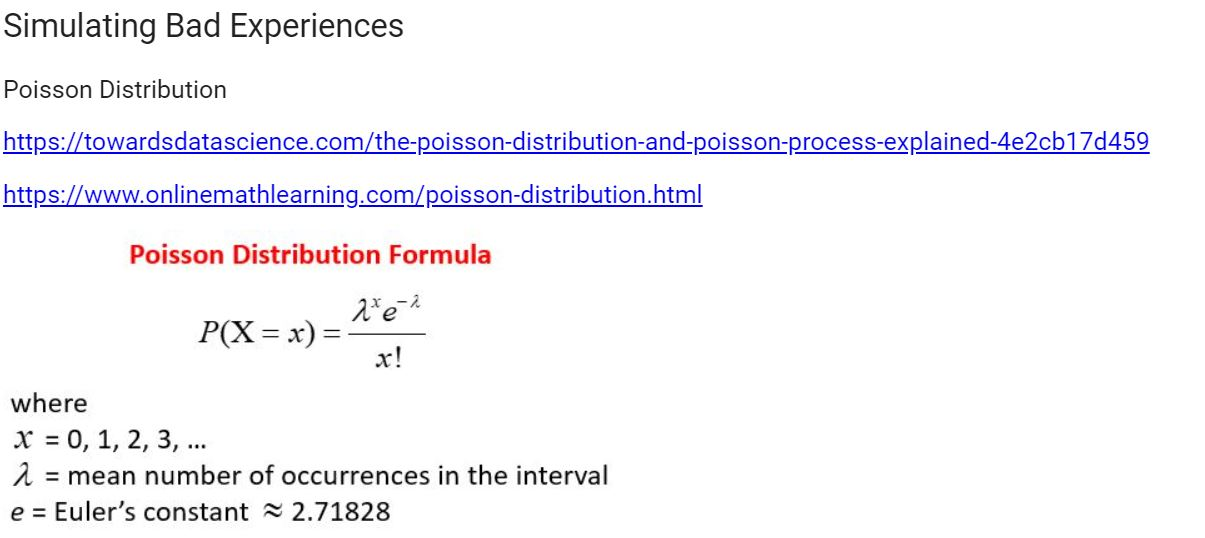

In [ ]:
#Point to capacity variables accross all stations
capacity = df.groupby(['Station ID'])['Capacity'].max()

In [ ]:
#Point to arrival and departure rates for the 8:00am hour
arrival_rate = arrivals.loc[8,:]
departure_rate = departures.loc[8,:]

In [ ]:
#Write a function to simulate arrivals and departures in random order & quantity
def make_list(a, d):
  A_List = ['a' for i in range(np.random.poisson(a))]
  D_List = ['d' for i in range(np.random.poisson(d))]

  A_List.extend(D_List)
  np.random.shuffle(A_List)
  return A_List

In [ ]:
#Write our station sim function
def station_sim(a, d, b, max_cap):
  '''simulates interactions at each station'''
  bad_exp = 0
  for i in make_list(a, d):
    if i =='a':
      b += 1
      if b > max_cap:
        bad_exp += 1 
        b -= 1
    if i == 'd':
      b -= 1
      if b < 0:
        bad_exp +=1
        b += 1

  return bad_exp


In [ ]:
#Example of the output of this function
station_sim(6.15, 9.8, 5, 10)

4

In [ ]:
#Create a DF to iterate through using above function 
function_df = pd.DataFrame({'a': arrival_rate, 'd': departure_rate, 'c': capacity})


In [ ]:
function_df

,a,d,c
1.0,1.00,3.40,19.0
2.0,2.67,3.14,37.0
3.0,18.83,9.50,32.0
4.0,1.89,3.76,23.0
5.0,9.42,3.51,27.0
...,...,...,...
818.0,3.21,4.00,13.0
819.0,2.42,3.10,38.0
820.0,1.00,4.92,24.0
821.0,2.03,2.25,27.0


In [ ]:
# iterate through all stations at the 8:00am hour
# store all relevant data
# print out optimal inventory levels
arrival_data = []
departure_data = []
capacity_data = []
bike_inventory = []
experience_data = []

for station in function_df.T:
  optimal_starting_bikes = 0
  fewest_bad_exp = 1000

  print(f'station: {station}')
  for i in range(int(function_df['c'][station])+1):
    arrival_data.append(function_df['a'][station])
    departure_data.append(function_df['d'][station])
    capacity_data.append(function_df['c'][station])
    bike_inventory.append(i)

    sim_results = []
    for simulation in range(10000):
      result = station_sim(function_df['a'][station], 
                           function_df['d'][station], i, 
                           function_df['c'][station])
      sim_results.append(result)

    columns = ['Sim_Results']
    Bad_Experiences_Expected = pd.DataFrame(columns=columns, data=sim_results)

    mean_bad_experiences = Bad_Experiences_Expected.mean()[0]
    experience_data.append(mean_bad_experiences)
    if mean_bad_experiences < fewest_bad_exp:
      optimal_starting_bikes = i
      fewest_bad_exp = mean_bad_experiences

    print(f'The number of bad experiences expected with {i} starting bikes is: {mean_bad_experiences}')
  print(f'The optimal number of bikes is {optimal_starting_bikes}')




station: 1.0
The number of bad experiences expected with 0 starting bikes is: 2.7595
The number of bad experiences expected with 1 starting bikes is: 1.8331
The number of bad experiences expected with 2 starting bikes is: 1.1193
The number of bad experiences expected with 3 starting bikes is: 0.6014
The number of bad experiences expected with 4 starting bikes is: 0.3001
The number of bad experiences expected with 5 starting bikes is: 0.1264
The number of bad experiences expected with 6 starting bikes is: 0.0529
The number of bad experiences expected with 7 starting bikes is: 0.0199
The number of bad experiences expected with 8 starting bikes is: 0.0052
The number of bad experiences expected with 9 starting bikes is: 0.0023
The number of bad experiences expected with 10 starting bikes is: 0.0002
The number of bad experiences expected with 11 starting bikes is: 0.0
The number of bad experiences expected with 12 starting bikes is: 0.0002
The number of bad experiences expected with 13 star

ValueError: ignored